In [24]:
import pandas as pd
import numpy as np
from collections import Counter
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.sandbox.stats.multicomp as sm
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import math
import graphviz
from collections import Counter

In [2]:
data = pd.read_csv('Pokemon.csv')
data['Type 2']=data['Type 2'].replace('NaN', 'no')
data

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [3]:
legendaries = data[data['Legendary']==True]
commons = data[data['Legendary']==False]

## Legendaries

In [9]:
print('number :', len(legendaries))
print('average total stats :', np.mean(legendaries['Total']))
for stat in ['HP', 'Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed']:
    print('average', stat, ':', np.mean(legendaries[stat]))
print('Number of legendaries per type :', Counter(legendaries['Type 1']))
print('Number of legendaries per generation :', Counter(legendaries['Generation']))
#print('IDs :', list(legendaries['#']))

number : 75
average total stats : 630.2666666666667
average HP : 93.08
average Attack : 113.37333333333333
average Defense : 98.93333333333334
average Sp. Atk : 119.73333333333333
average Sp. Def : 105.01333333333334
average Speed : 100.13333333333334
Number of legendaries per type : Counter({'Psychic': 17, 'Dragon': 12, 'Water': 8, 'Fire': 5, 'Electric': 4, 'Rock': 4, 'Steel': 4, 'Ground': 4, 'Normal': 4, 'Grass': 3, 'Ice': 2, 'Ghost': 2, 'Dark': 2, 'Flying': 2, 'Bug': 1, 'Fairy': 1})
Number of legendaries per generation : Counter({5: 20, 3: 18, 4: 16, 6: 8, 1: 7, 2: 6})


## Non-legendaries

In [8]:
print('number :', len(commons))
print('average stats :', np.mean(commons['Total']))
for stat in ['HP', 'Attack','Defense', 'Sp. Atk', 'Sp. Def', 'Speed']:
    print('average', stat, ':', np.mean(commons[stat]))
print('Number of non-legendaries per type :', Counter(commons['Type 1']))
print('Number of non-legendaries per generation :', Counter(commons['Generation']))
#print('IDs :', list(commons['#']))

number : 725
average stats : 414.9131034482759
average HP : 66.79448275862069
average Attack : 75.4455172413793
average Defense : 71.24689655172413
average Sp. Atk : 67.96689655172413
average Sp. Def : 68.47724137931034
average Speed : 64.98206896551724
Number of non-legendaries per type : Counter({'Water': 104, 'Normal': 94, 'Bug': 68, 'Grass': 67, 'Fire': 47, 'Electric': 40, 'Psychic': 40, 'Rock': 40, 'Ghost': 30, 'Dark': 29, 'Poison': 28, 'Ground': 28, 'Fighting': 27, 'Steel': 23, 'Ice': 22, 'Dragon': 20, 'Fairy': 16, 'Flying': 2})
Number of non-legendaries per generation : Counter({1: 159, 5: 145, 3: 142, 4: 105, 2: 100, 6: 74})


In [17]:
def correlation_columns(data, class_to_predict):
    n = np.shape(data)[1]
    dict_corr = {}
    for feature in data.columns:
        if feature==class_to_predict:
            continue
        corr, pval = spearmanr(data[feature], data[class_to_predict])
        dict_corr[feature]= corr, pval
    return dict_corr

In [111]:
corr_pval = correlation_columns(data, 'Defense')
dict(sorted(corr_pval.items(), key=lambda x:x[1], reverse=True))

{'Type 2': (nan, nan),
 'Total': (0.6818641809814782, 1.7761307077750298e-110),
 'Sp. Def': (0.5788164910445328, 9.67370266103567e-73),
 'Attack': (0.5149946056788183, 2.1597981316449784e-55),
 'HP': (0.433401747319042, 5.744027179753025e-38),
 'Sp. Atk': (0.31421702523225425, 8.618117974741995e-20),
 'Legendary': (0.29099604717222644, 4.457456275161717e-17),
 '#': (0.11744373856339439, 0.0008742776305834208),
 'Speed': (0.09281775844217616, 0.008617925255959499),
 'Type 1': (0.08814145729136508, 0.012632174650459651),
 'Generation': (0.057776100452835426, 0.10247658852236204),
 'Name': (-0.023232001878090134, 0.5117203174792913)}

In [106]:
threshold_leg = [144, 243, 377, 480, 638, 716]
count=0
for gen in range(1, 7):
    print(gen)
    data_i = data[data['Generation']==gen]
    list_id = []
    for i in range(len(data_i['#'])):
        if data_i['#'][i+count]<threshold_leg[gen-1]:
            list_id.append(0)
        else:
            list_id.append(1)
    count+=len(data_i['#'])
    print(spearmanr(list_id, data_i['Legendary']))

1
SpearmanrResult(correlation=0.82872942075818, pvalue=3.4080041766115255e-43)
2
SpearmanrResult(correlation=0.7589466384404111, pvalue=4.287719687643134e-21)
3
SpearmanrResult(correlation=0.9999999999999999, pvalue=0.0)
4
SpearmanrResult(correlation=1.0, pvalue=0.0)
5
SpearmanrResult(correlation=0.9713357558974813, pvalue=1.270259215273478e-103)
6
SpearmanrResult(correlation=1.0, pvalue=0.0)


<AxesSubplot:>

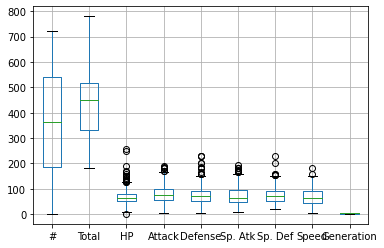

In [34]:
list_int_feature=[]
for feature in data.columns:
    if type(data[feature][0])==np.int64:
        list_int_feature.append(feature)
data.boxplot(column=list_int_feature)

# Clustering by unsupervised learning

In [107]:
def clustering_by_unsupervised_learning(data, feature1, feature2, class_to_predict):
    X = data[[feature1, feature2]]
    Y = data[class_to_predict]
    k=2
    plt.title("Two informative features, one cluster per class")
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], marker='o', c=Y, s=25, edgecolor='k')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

    # K-mean
    km = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
    km.fit(X)
    plt.title("K-MEAN")
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=10, c=km.labels_)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

    # Hierarchical clustering
    clusterings = []
    for linkage in ('ward', 'average', 'complete'):
        clustering = AgglomerativeClustering(linkage=linkage, n_clusters=k)
        clustering.fit(X)
        clusterings.append(clustering)
        plt.xlabel(feature1)
        plt.ylabel(feature2)
        plt.title("Hierarchical clustering ("+linkage+")")
        plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=10, c=clustering.labels_)
        plt.show()

    # Spectral clustering
    spectral = cluster.SpectralClustering(n_clusters=k, eigen_solver='arpack', affinity="nearest_neighbors")
    spectral.fit(X)
    plt.title("Spectral Clustering")
    plt.scatter(X.iloc[:, 0], X.iloc[:, 1], s=10, c=spectral.labels_)
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()
    
    return km, clusterings, spectral

In [108]:
def evaluation(km, clusterings, spectral):
    # comparison of the three methods
    methods = ['K-MEAN', 'Clustering(Ward)', 'Clustering (Average)', 'Clustering (Complete)', 'Spectral Clustering']
    list_results = [km, clusterings[0], clusterings[1], clusterings[2], spectral]
    Scores_1 = [[], [], [], [], []]
    
    for result in list_results:
        Scores_1[0].append(metrics.homogeneity_score(Y, result.labels_))
        Scores_1[1].append(metrics.completeness_score(Y, result.labels_))
        Scores_1[2].append(metrics.v_measure_score(Y, result.labels_))
        Scores_1[3].append(metrics.adjusted_rand_score(Y, result.labels_))
        Scores_1[4].append(metrics.silhouette_score(X, result.labels_))
    
    for i in range(5):
        print(methods[i])
        print("Homogeneity :", Scores_1[0][i])
        print("Completeness :", Scores_1[1][i])
        print("V-measure :", Scores_1[2][i])
        print("Adjusted Rand-Index :", Scores_1[3][i])
        print("Silhouette Coefficient :", Scores_1[4][i], '\n')

## Test on stat total and each stat

In [ ]:
for feature in ['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']:
    print(feature)
    km, clusterings, spectral = clustering_by_unsupervised_learning(data, 'Total', feature, 'Legendary')
    evaluation(km, clusterings, spectral)

# DECISIONS TREE

In [5]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
feature_int = [feature for feature in data.columns if type(data[feature][0])==np.int64 and feature not in ['Generation', '#']]
clf = clf.fit(data[feature_int], data['Legendary'])
class_pred_DT = clf.predict(data[feature_int])

In [6]:
dot_data = tree.export_graphviz(clf, out_file=None, feature_names=feature_int, 
                                class_names=['Not Legendary', 'Legendary'], filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render('Lengendary status (entropy)')

'Lengendary status (entropy).pdf'

In [11]:
data[feature_int]

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
0,318,45,49,49,65,65,45
1,405,60,62,63,80,80,60
2,525,80,82,83,100,100,80
3,625,80,100,123,122,120,80
4,309,39,52,43,60,50,65
...,...,...,...,...,...,...,...
795,600,50,100,150,100,150,50
796,700,50,160,110,160,110,110
797,600,80,110,60,150,130,70
798,680,80,160,60,170,130,80


In [23]:
print(clf.decision_path([[700, 100, 180, 120, 30, 70, 200]]))

  (0, 0)	1
  (0, 12)	1
  (0, 13)	1
  (0, 15)	1


C:\Users\llego\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [16]:
print(Counter(data['HP']))

Counter({60: 67, 50: 63, 70: 57, 65: 46, 80: 43, 75: 43, 45: 38, 40: 38, 55: 37, 100: 32, 90: 27, 95: 22, 85: 19, 35: 15, 30: 13, 105: 10, 78: 9, 110: 9, 44: 7, 79: 7, 91: 7, 68: 7, 62: 7, 58: 6, 59: 6, 38: 6, 20: 6, 64: 6, 106: 5, 72: 5, 76: 5, 67: 5, 74: 5, 61: 4, 73: 4, 125: 4, 150: 4, 86: 4, 71: 4, 108: 4, 54: 4, 63: 3, 83: 3, 115: 3, 130: 3, 48: 3, 41: 3, 43: 3, 66: 3, 77: 3, 49: 3, 103: 3, 120: 3, 89: 3, 39: 2, 46: 2, 25: 2, 52: 2, 84: 2, 53: 2, 57: 2, 69: 2, 123: 2, 82: 2, 126: 2, 81: 1, 140: 1, 10: 1, 250: 1, 160: 1, 190: 1, 255: 1, 28: 1, 31: 1, 1: 1, 104: 1, 144: 1, 170: 1, 99: 1, 37: 1, 97: 1, 111: 1, 135: 1, 116: 1, 36: 1, 51: 1, 114: 1, 165: 1, 109: 1, 92: 1, 56: 1, 88: 1, 101: 1, 42: 1})


<function matplotlib.pyplot.show(close=None, block=None)>

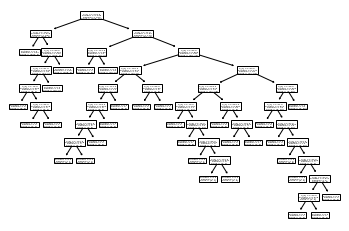

In [27]:
tree.plot_tree(clf)
plt.show

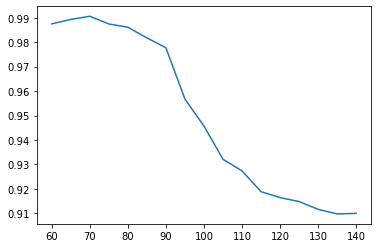

In [67]:
rate_common = []
for i in range(60, 145, 5):
    rate_common.append(len(commons[commons['Speed']<i])/len(data[data['Speed']<i]))
plt.plot(range(60, 145, 5), rate_common)
plt.show()

In [120]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(data[feature_int], data['Legendary'])
class_pred_RF = clf.predict(data[feature_int])

In [122]:
importance = clf.feature_importances_
print(importance)

[0.39073476 0.08393827 0.04904614 0.06680186 0.18185804 0.08710185
 0.14051906]


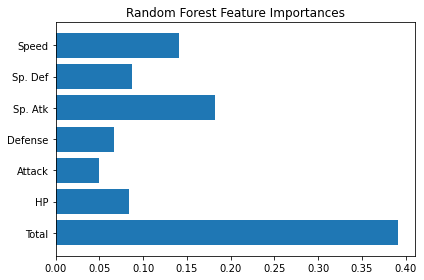

In [125]:
y_ticks = np.arange(0, len(feature_int))
fig, ax = plt.subplots()
ax.barh(y_ticks, importance)
ax.set_yticks(y_ticks)
ax.set_yticklabels(feature_int)
ax.set_title("Random Forest Feature Importances")
fig.tight_layout()
plt.show()

# LOGISTIC REGRESSION